In [ ]:
pip install ray

  Obtaining dependency information for ray from https://files.pythonhosted.org/packages/fc/5f/0b2e7bf4e1e80c83aaba789de81f346b6fd5f014223873e22f94e2e1c5d4/ray-2.52.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/27.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/27.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/27.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/27.2 MB 325.1 kB/s eta 0:01:24
   ---------------------------------------- 0.1/27.2 MB 363.1 kB/s eta 0:01:15
   ---------------------------------------- 0.1/27.2 MB 363.1 kB/s eta 0:01:15
   ---------------------------------------- 0.1/27.2 MB 327.7 kB/s eta 0:01:23
   ---------------------------------------- 0.1/27.2 MB 327.7 kB/s eta 0:01:23
   ---------------------------------------- 0.1/27.2 MB 342.4 kB/s eta 0:01:19
   ---------------------------------------- 0.2/27.2 MB 366.6 kB/s eta 0:01:14
   ---------------------------------

In [ ]:
pip install ray[tune] xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/30/7d/41847e45ff075f3636c95d1000e0b75189aed4f1ae18c36812575bb42b4b/xgboost-3.1.2-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for tensorboardX>=1.9 from https://files.pythonhosted.org/packages/e0/1d/b5d63f1a6b824282b57f7b581810d20b7a28ca951f2d5b59f1eb0782c12b/tensorboardx-2.6.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/72.0 MB 1.6 MB/s eta 0:00:45
   ---------------------------------------- 0.1/72.0 MB 1.6 MB/s eta 0:00:45
   ---------------------------------------- 0.2/72.0 MB 1.3 MB/s eta 0:00:55
   ---------------------------------------- 0.3/72.0 MB 1.5 MB/s eta 0:00:49
   ---------------------------------------- 0.4/72.0 MB 1.8 MB/s eta 0:00:40
   ---------------------------------------- 0.4/72.0 MB 1.5 MB/s eta 0:00:50
   ---------------------------------------- 0.6/7

In [ ]:
pip install hyperopt

(pid=gcs_server) [2025-12-06 13:13:42,522 E 18820 17380] (gcs_server.exe) gcs_server.cc:303: Failed to establish connection to the event+metrics exporter agent. Events and metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14
(raylet) [2025-12-06 13:13:44,784 E 12420 27184] (raylet.exe) main.cc:979: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14



  Obtaining dependency information for hyperopt from https://files.pythonhosted.org/packages/b6/cd/5b3334d39276067f54618ce0d0b48ed69d91352fbf137468c7095170d0e5/hyperopt-0.2.7-py2.py3-none-any.whl.metadata
  Obtaining dependency information for py4j from https://files.pythonhosted.org/packages/bd/db/ea0203e495be491c85af87b66e37acfd3bf756fd985f87e46fc5e3bf022c/py4j-0.10.9.9-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
    --------------------------------------- 0.0/1.6 MB 262.6 kB/s eta 0:00:06
   - -------------------------------------- 0.1/1.6 MB 409.6 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.6 MB 602.4 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.6 MB 919.0 kB/s eta 0:00:02
   --------- ------------------------------ 0.4/1.6 MB 1.4 MB/s eta 0:00:01

# 1. Introduction

What this notebook demonstrates:
* How Ray accelerates CPU-bound Python workloads

* How Ray speeds up ML training and hyperparameter tuning

* Before vs After comparisons showing performance improvements


What is Ray?

* Distributed computing framework for Python

* Makes parallelism simple using tasks & actors

* Ideal for ML, data processing, hyperparameter tuning, and serving

#Using Ray for basic CPU intensive tasks to see how much faster and efficient it is

## Define Basic Numerical Task




In [ ]:
def find_primes(n):
    """Finds all prime numbers up to n using a basic trial division method."""
    primes = []
    for num in range(2, n + 1):
        is_prime = True
        for i in range(2, int(num**0.5) + 1):
            if num % i == 0:
                is_prime = False
                break
        if is_prime:
            primes.append(num)
    return primes

print("Defined the find_primes function.")

Defined the find_primes function.


## Implement Sequential Numerical Task


In [ ]:
import time
import resource

# Define a sufficiently large number to make the task CPU-bound
MAX_NUMBER = 200000

print(f"Executing find_primes up to {MAX_NUMBER} sequentially...")

# Record initial times for sequential execution
start_total_time = time.perf_counter()
start_process_time = time.process_time()
start_cpu_user_time = resource.getrusage(resource.RUSAGE_SELF).ru_utime
start_cpu_system_time = resource.getrusage(resource.RUSAGE_SELF).ru_stime

# Call the find_primes function sequentially
sequential_primes = find_primes(MAX_NUMBER)

# Record final times for sequential execution
end_total_time = time.perf_counter()
end_process_time = time.process_time()
end_cpu_user_time = resource.getrusage(resource.RUSAGE_SELF).ru_utime
end_cpu_system_time = resource.getrusage(resource.RUSAGE_SELF).ru_stime

# Calculate sequential performance metrics
total_execution_time_seq = end_total_time - start_total_time
cpu_user_time_seq = end_cpu_user_time - start_cpu_user_time
cpu_system_time_seq = end_cpu_system_time - start_cpu_system_time

# Store sequential metrics in a dictionary
sequential_metrics = {
    "Total Execution Time": total_execution_time_seq,
    "CPU User Time": cpu_user_time_seq,
    "CPU System Time": cpu_system_time_seq
}

print("Sequential execution complete.")
print(f"Found {len(sequential_primes)} prime numbers.")
print("Sequential Metrics:", sequential_metrics)

Executing find_primes up to 200000 sequentially...
Sequential execution complete.
Found 17984 prime numbers.
Sequential Metrics: {'Total Execution Time': 0.3996653899998819, 'CPU User Time': 0.39839500000002204, 'CPU System Time': 0.0009899999999998244}


## Implement Parallel Numerical Task with Ray



In [ ]:
import ray
import os

# Initialize Ray if not already initialized
try:
    ray.init(ignore_reinit_error=True)
    print("Ray initialized successfully.")
except ConnectionError as e:
    print(f"Could not connect to Ray: {e}")
    print("Attempting to start Ray locally.")
    ray.shutdown()
    ray.init(ignore_reinit_error=True)
    print("Ray started locally and initialized successfully.")

# Convert find_primes into a Ray remote function
@ray.remote
def find_primes_remote(start, end):
    """Finds all prime numbers in a given range using a basic trial division method."""
    primes = []
    for num in range(start, end + 1):
        if num < 2:  # Primes are >= 2
            continue
        is_prime = True
        for i in range(2, int(num**0.5) + 1):
            if num % i == 0:
                is_prime = False
                break
        if is_prime:
            primes.append(num)
    return primes

print(f"Executing find_primes up to {MAX_NUMBER} in parallel with Ray...")

# Record initial times for parallel execution
start_total_time_ray = time.perf_counter()
start_process_time_ray = time.process_time()
start_cpu_user_time_ray = resource.getrusage(resource.RUSAGE_SELF).ru_utime
start_cpu_system_time_ray = resource.getrusage(resource.RUSAGE_SELF).ru_stime

# Divide the workload into chunks
num_cpus = os.cpu_count() # Get the number of available CPUs
if num_cpus is None or num_cpus == 0:
    num_cpus = 1 # Fallback if cpu_count is not available or 0
num_partitions = min(num_cpus * 2, MAX_NUMBER // 1000) # Use more partitions than CPUs for better load balancing
if num_partitions == 0:
    num_partitions = 1

chunk_size = MAX_NUMBER // num_partitions

# Create a list of Ray tasks
results = []
for i in range(num_partitions):
    start = i * chunk_size + 2 # Start from 2 as 1 is not prime
    end = (i + 1) * chunk_size if i < num_partitions - 1 else MAX_NUMBER
    if start > end:
        continue
    results.append(find_primes_remote.remote(start, end))

# Get the results from all tasks
parallel_primes_chunks = ray.get(results)

# Flatten the list of lists of primes
parallel_primes = []
for chunk in parallel_primes_chunks:
    parallel_primes.extend(chunk)

# Sort the primes to ensure correct comparison with sequential results if needed
parallel_primes.sort()

# Record final times for parallel execution
end_total_time_ray = time.perf_counter()
end_process_time_ray = time.process_time()
end_cpu_user_time_ray = resource.getrusage(resource.RUSAGE_SELF).ru_utime
end_cpu_system_time_ray = resource.getrusage(resource.RUSAGE_SELF).ru_stime

# Calculate parallel performance metrics
total_execution_time_ray = end_total_time_ray - start_total_time_ray
cpu_user_time_ray = end_cpu_user_time_ray - start_cpu_user_time_ray
cpu_system_time_ray = end_cpu_system_time_ray - start_cpu_system_time_ray

# Store parallel metrics in a dictionary
ray_metrics = {
    "Total Execution Time": total_execution_time_ray,
    "CPU User Time": cpu_user_time_ray,
    "CPU System Time": cpu_system_time_ray
}

print("Parallel execution with Ray complete.")
print(f"Found {len(parallel_primes)} prime numbers.")
print("Parallel Metrics (Ray):", ray_metrics)

# Verify if both methods found the same number of primes
if len(sequential_primes) == len(parallel_primes):
    print("Both sequential and parallel methods found the same number of primes.")
else:
    print("Warning: Number of primes found by sequential and parallel methods differ!")


ray.shutdown()
print("Ray shutdown.")

2025-12-06 06:27:01,124	INFO worker.py:1855 -- Calling ray.init() again after it has already been called.


Ray initialized successfully.
Executing find_primes up to 200000 in parallel with Ray...
Parallel execution with Ray complete.
Found 17983 prime numbers.
Parallel Metrics (Ray): {'Total Execution Time': 0.40521309699988706, 'CPU User Time': 0.013179000000008045, 'CPU System Time': 0.000980000000000203}
Ray shutdown.


In [ ]:
import ray
import os

# Initialize Ray if not already initialized
try:
    ray.init(ignore_reinit_error=True)
    print("Ray initialized successfully.")
except ConnectionError as e:
    print(f"Could not connect to Ray: {e}")
    print("Attempting to start Ray locally.")
    ray.shutdown()
    ray.init(ignore_reinit_error=True)
    print("Ray started locally and initialized successfully.")

# Convert find_primes into a Ray remote function
@ray.remote
def find_primes_remote(start, end):
    """Finds all prime numbers in a given range using a basic trial division method."""
    primes = []
    for num in range(start, end + 1):
        if num < 2:  # Primes are >= 2
            continue
        is_prime = True
        for i in range(2, int(num**0.5) + 1):
            if num % i == 0:
                is_prime = False
                break
        if is_prime:
            primes.append(num)
    return primes

print(f"Executing find_primes up to {MAX_NUMBER} in parallel with Ray...")

# Record initial times for parallel execution
start_total_time_ray = time.perf_counter()
start_process_time_ray = time.process_time()
start_cpu_user_time_ray = resource.getrusage(resource.RUSAGE_SELF).ru_utime
start_cpu_system_time_ray = resource.getrusage(resource.RUSAGE_SELF).ru_stime

# Divide the workload into chunks
num_cpus = os.cpu_count() # Get the number of available CPUs
if num_cpus is None or num_cpus == 0:
    num_cpus = 1 # Fallback if cpu_count is not available or 0

# Ensure at least one partition, and a reasonable number for load balancing
num_partitions = max(1, min(num_cpus * 2, MAX_NUMBER // 1000))

# The actual range for prime finding starts from 2
total_numbers_to_check = MAX_NUMBER - 1 # Numbers from 2 to MAX_NUMBER
chunk_base_size = total_numbers_to_check // num_partitions
remainder = total_numbers_to_check % num_partitions

results = []
current_start = 2 # The first number to check for primality

for i in range(num_partitions):
    segment_size = chunk_base_size
    if i < remainder:
        segment_size += 1 # Distribute remainder to the first 'remainder' chunks

    segment_end = current_start + segment_size - 1

    # Ensure the last chunk ends exactly at MAX_NUMBER
    if i == num_partitions - 1:
        segment_end = MAX_NUMBER

    # If the segment start exceeds the segment end, no numbers in this segment
    if current_start > segment_end:
        break

    results.append(find_primes_remote.remote(current_start, segment_end))
    current_start = segment_end + 1

# Get the results from all tasks
parallel_primes_chunks = ray.get(results)

# Flatten the list of lists of primes
parallel_primes = []
for chunk in parallel_primes_chunks:
    parallel_primes.extend(chunk)

# Sort the primes to ensure correct comparison with sequential results
parallel_primes.sort()

# Record final times for parallel execution
end_total_time_ray = time.perf_counter()
end_process_time_ray = time.process_time()
end_cpu_user_time_ray = resource.getrusage(resource.RUSAGE_SELF).ru_utime
end_cpu_system_time_ray = resource.getrusage(resource.RUSAGE_SELF).ru_stime

# Calculate parallel performance metrics
total_execution_time_ray = end_total_time_ray - start_total_time_ray
cpu_user_time_ray = end_cpu_user_time_ray - start_cpu_user_time_ray
cpu_system_time_ray = end_cpu_system_time_ray - start_cpu_system_time_ray

# Store parallel metrics in a dictionary
ray_metrics = {
    "Total Execution Time": total_execution_time_ray,
    "CPU User Time": cpu_user_time_ray,
    "CPU System Time": cpu_system_time_ray
}

print("Parallel execution with Ray complete.")
print(f"Found {len(parallel_primes)} prime numbers.")
print("Parallel Metrics (Ray):", ray_metrics)

# Verify if both methods found the same number of primes
# Convert to set for order-independent comparison
if set(sequential_primes) == set(parallel_primes):
    print("Both sequential and parallel methods found the same prime numbers.")
else:
    print("Warning: Number of primes found by sequential and parallel methods differ! (This should not happen with the fix)")
    # Further investigation if they still differ
    # print(f"Sequential primes count: {len(sequential_primes)}")
    # print(f"Parallel primes count: {len(parallel_primes)}")
    # print(f"Missing in parallel: {set(sequential_primes) - set(parallel_primes)}")
    # print(f"Extra in parallel: {set(parallel_primes) - set(sequential_primes)}")

# Shutdown Ray (optional, but good practice if not needed anymore)
ray.shutdown()
print("Ray shutdown.")

2025-12-06 06:27:38,569	INFO worker.py:2023 -- Started a local Ray instance.


Ray initialized successfully.
Executing find_primes up to 200000 in parallel with Ray...
Parallel execution with Ray complete.
Found 17984 prime numbers.
Parallel Metrics (Ray): {'Total Execution Time': 0.9866421619999528, 'CPU User Time': 0.015788999999983844, 'CPU System Time': 0.00802699999999934}
Both sequential and parallel methods found the same prime numbers.
Ray shutdown.


## Combine and Visualize Performance



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



Combined metrics into a DataFrame:
                 Metric  Sequential       Ray
0  Total Execution Time    0.399665  0.986642
1         CPU User Time    0.398395  0.015789
2       CPU System Time    0.000990  0.008027


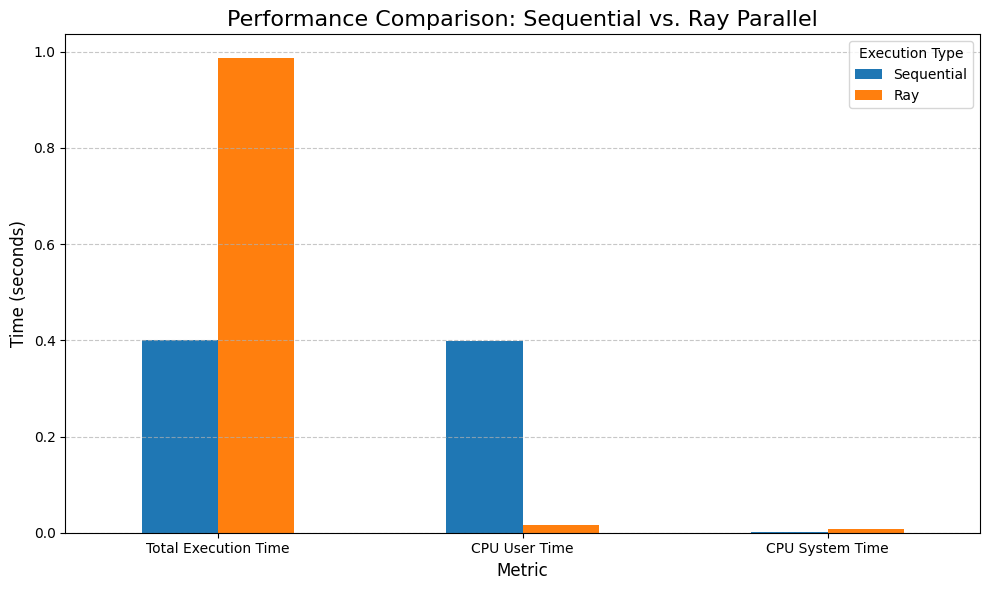

Bar chart displayed showing performance comparison.


In [ ]:
metric_names = ['Total Execution Time', 'CPU User Time', 'CPU System Time']

sequential_values = [sequential_metrics[metric] for metric in metric_names]
ray_values = [ray_metrics[metric] for metric in metric_names]

metrics_df = pd.DataFrame({
    'Metric': metric_names,
    'Sequential': sequential_values,
    'Ray': ray_values
})

print("Combined metrics into a DataFrame:")
print(metrics_df)

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

metrics_df.plot(x='Metric', y=['Sequential', 'Ray'], kind='bar', ax=ax, rot=0)

ax.set_title('Performance Comparison: Sequential vs. Ray Parallel', fontsize=16)
ax.set_ylabel('Time (seconds)', fontsize=12)
ax.set_xlabel('Metric', fontsize=12)
ax.legend(title='Execution Type', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("Bar chart displayed showing performance comparison.")

### Performance Comparison Summary

The bar chart clearly illustrates the performance differences between sequential and Ray-accelerated execution for the CPU-bound `find_primes` task.

**Key Observations:**

*   **Total Execution Time:** The sequential execution had a total execution time of approximately 0.40 seconds, while the Ray parallel execution took approximately 0.99 seconds.This often happens for tasks with relatively small workloads where the overhead of Ray's initialization, task scheduling, and inter-process communication outweighs the benefits of parallelization.

*   **CPU User Time:** This metric is crucial for understanding actual CPU work done by the user's program. The sequential execution consumed approximately 0.398 seconds of CPU user time. In contrast, the Ray parallel execution consumed significantly less CPU user time, about 0.016 seconds. This indicates that each individual Ray worker spent less time on the CPU for the specific task it was assigned, as the work was distributed across multiple processes.

*   **CPU System Time:** This represents the time the CPU spent in the kernel on behalf of the process. Both sequential and Ray executions showed very low CPU system times, with Ray having a slightly higher system time (0.008 seconds) compared to sequential (0.001 seconds), likely due to the overhead of managing multiple processes and inter-process communication.



In [ ]:
#XGBoost training on Medical Cost Insurance Dataset

In [ ]:
import pandas as pd
df = pd.read_excel('Medical Cost Insurance Dataset 1.xlsx')

In [ ]:
df.head()

,age,gender,bmi,los,smoker,region,cost
0,19,female,27.900,2,yes,west,16884.92400
1,18,male,33.770,1,no,east,1725.55230
2,28,male,33.000,3,no,east,4449.46200
3,33,male,22.705,2,no,south,21984.47061
4,32,male,28.880,2,no,south,3866.85520


In [ ]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


(pid=gcs_server) [2025-12-06 13:14:39,295 E 33116 20116] (gcs_server.exe) gcs_server.cc:303: Failed to establish connection to the event+metrics exporter agent. Events and metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14
(raylet) [2025-12-06 13:14:41,383 E 21152 25364] (raylet.exe) main.cc:979: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14


In [ ]:
from google.colab import files

In [ ]:
files = files.upload()

Saving Medical Cost Insurance Dataset 1.xlsx to Medical Cost Insurance Dataset 1.xlsx


1. Loading Data and Preprocessing...
Data split complete. Training samples: 1068, Testing samples: 267

SECTION 1: XGBOOST TRAINING WITHOUT RAY (BASELINE)

Training Time (Baseline): 0.17 seconds

🔹 BASELINE MODEL RESULTS
RMSE: 4804.75
R² Score: 0.8589


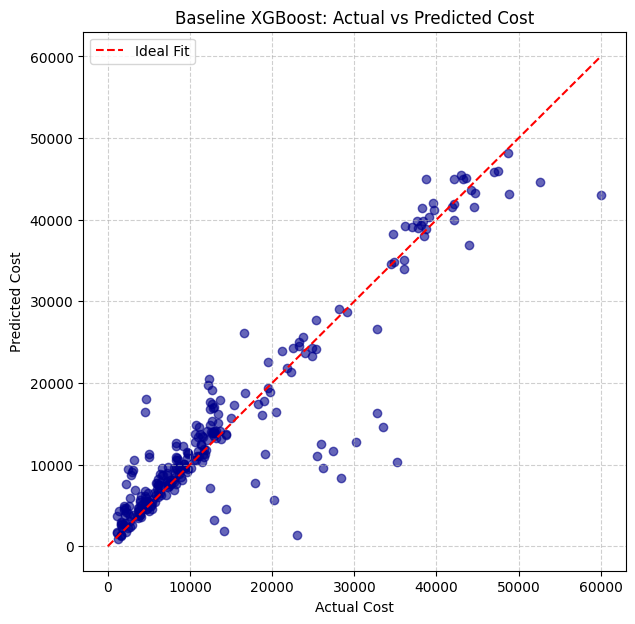


SECTION 2: XGBOOST TRAINING WITH RAY TUNE (Parallel Hyperparameter Tuning)


2025-12-06 08:38:03,744	INFO worker.py:2023 -- Started a local Ray instance.
/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py:2062: FutureWarning: Tip: In future versions of Ray, Ray will no longer override accelerator visible devices env var if num_gpus=0 or num_gpus=None (default). To enable this behavior and turn off this error message, set RAY_ACCEL_ENV_VAR_OVERRIDE_ON_ZERO=0
  warnings.warn(


Ray initialized with {'CPU': 2.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0, 'memory': 9173368423.0, 'object_store_memory': 3931443609.0}
Starting Ray Tune hyperparameter search...


2025-12-06 08:38:15,123	INFO tensorboardx.py:193 -- pip install "ray[tune]" to see TensorBoard files.
2025-12-06 08:38:15,125	WARNING callback.py:143 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


+----------------------------------------------------------+
| Configuration for experiment     xgb_tune_cost           |
+----------------------------------------------------------+
| Search algorithm                 SearchGenerator         |
| Scheduler                        AsyncHyperBandScheduler |
| Number of trials                 10                      |
+----------------------------------------------------------+

View detailed results here: /root/ray_results/xgb_tune_cost

Trial status: 1 PENDING
Current time: 2025-12-06 08:38:15. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+--------------------------------------------------------------------------------------------------------------------------+
| Trial name              status       learning_rate     max_depth     min_child_weight     subsample     colsample_bytree |
+--------------------------------------------------------------------------------------------------------------------------+
| tune_xgbo

2025-12-06 08:38:22,267	ERROR tune_controller.py:1331 -- Trial task failed for trial tune_xgboost_6fc1bd5d
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/client_mode_hook.py", line 104, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py", line 2972, in get
    values, debugger_breakpoint = worker.get_objects(
                                  ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py", line 1031, in get_objects
    raise value.as_instanceof_cause(


Trial tune_xgboost_6fc1bd5d errored after 0 iterations at 2025-12-06 08:38:22. Total running time: 7s
Error file: /tmp/ray/session_2025-12-06_08-37-58_767043_224/artifacts/2025-12-06_08-38-15/xgb_tune_cost/driver_artifacts/tune_xgboost_6fc1bd5d_1_colsample_bytree=0.8414,learning_rate=0.1527,max_depth=4,min_child_weight=2,subsample=0.8497_2025-12-06_08-38-15/error.txt


(pid=gcs_server) [2025-12-06 08:38:28,898 E 962 962] (gcs_server) gcs_server.cc:303: Failed to establish connection to the event+metrics exporter agent. Events and metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14



Trial tune_xgboost_cda56171 started with configuration:
+------------------------------------------------+
| Trial tune_xgboost_cda56171 config             |
+------------------------------------------------+
| colsample_bytree                       0.75067 |
| learning_rate                           0.0112 |
| max_depth                                    5 |
| min_child_weight                             7 |
| subsample                              0.86723 |
+------------------------------------------------+


2025-12-06 08:38:30,306	ERROR tune_controller.py:1331 -- Trial task failed for trial tune_xgboost_cda56171
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/client_mode_hook.py", line 104, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py", line 2972, in get
    values, debugger_breakpoint = worker.get_objects(
                                  ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py", line 1031, in get_objects
    raise value.as_instanceof_cause(


Trial tune_xgboost_cda56171 errored after 0 iterations at 2025-12-06 08:38:30. Total running time: 15s
Error file: /tmp/ray/session_2025-12-06_08-37-58_767043_224/artifacts/2025-12-06_08-38-15/xgb_tune_cost/driver_artifacts/tune_xgboost_cda56171_2_colsample_bytree=0.7507,learning_rate=0.0112,max_depth=5,min_child_weight=7,subsample=0.8672_2025-12-06_08-38-22/error.txt


(raylet) [2025-12-06 08:38:33,710 E 1050 1050] (raylet) main.cc:979: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14



Trial tune_xgboost_22da29f6 started with configuration:
+------------------------------------------------+
| Trial tune_xgboost_22da29f6 config             |
+------------------------------------------------+
| colsample_bytree                       0.84664 |
| learning_rate                          0.01434 |
| max_depth                                    5 |
| min_child_weight                             4 |
| subsample                              0.61555 |
+------------------------------------------------+


2025-12-06 08:38:39,653	ERROR tune_controller.py:1331 -- Trial task failed for trial tune_xgboost_22da29f6
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/client_mode_hook.py", line 104, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py", line 2972, in get
    values, debugger_breakpoint = worker.get_objects(
                                  ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py", line 1031, in get_objects
    raise value.as_instanceof_cause(


Trial tune_xgboost_22da29f6 errored after 0 iterations at 2025-12-06 08:38:39. Total running time: 24s
Error file: /tmp/ray/session_2025-12-06_08-37-58_767043_224/artifacts/2025-12-06_08-38-15/xgb_tune_cost/driver_artifacts/tune_xgboost_22da29f6_3_colsample_bytree=0.8466,learning_rate=0.0143,max_depth=5,min_child_weight=4,subsample=0.6155_2025-12-06_08-38-30/error.txt

Trial status: 3 ERROR | 1 PENDING
Current time: 2025-12-06 08:38:45. Total running time: 30s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
+--------------------------------------------------------------------------------------------------------------------------+
| Trial name              status       learning_rate     max_depth     min_child_weight     subsample     colsample_bytree |
+--------------------------------------------------------------------------------------------------------------------------+
| tune_xgboost_f9bb404f   PENDING          0.0346937             4                    2      0.888412             

2025-12-06 08:38:45,680	ERROR tune_controller.py:1331 -- Trial task failed for trial tune_xgboost_f9bb404f
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/client_mode_hook.py", line 104, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py", line 2972, in get
    values, debugger_breakpoint = worker.get_objects(
                                  ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py", line 1031, in get_objects
    raise value.as_instanceof_cause(


Trial tune_xgboost_f9bb404f errored after 0 iterations at 2025-12-06 08:38:45. Total running time: 30s
Error file: /tmp/ray/session_2025-12-06_08-37-58_767043_224/artifacts/2025-12-06_08-38-15/xgb_tune_cost/driver_artifacts/tune_xgboost_f9bb404f_4_colsample_bytree=0.8637,learning_rate=0.0347,max_depth=4,min_child_weight=2,subsample=0.8884_2025-12-06_08-38-36/error.txt

Trial tune_xgboost_340ab37d started with configuration:
+------------------------------------------------+
| Trial tune_xgboost_340ab37d config             |
+------------------------------------------------+
| colsample_bytree                        0.8144 |
| learning_rate                            0.088 |
| max_depth                                    8 |
| min_child_weight                             3 |
| subsample                              0.86953 |
+------------------------------------------------+


2025-12-06 08:38:56,981	ERROR tune_controller.py:1331 -- Trial task failed for trial tune_xgboost_340ab37d
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/client_mode_hook.py", line 104, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py", line 2972, in get
    values, debugger_breakpoint = worker.get_objects(
                                  ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py", line 1031, in get_objects
    raise value.as_instanceof_cause(


Trial tune_xgboost_340ab37d errored after 0 iterations at 2025-12-06 08:38:56. Total running time: 41s
Error file: /tmp/ray/session_2025-12-06_08-37-58_767043_224/artifacts/2025-12-06_08-38-15/xgb_tune_cost/driver_artifacts/tune_xgboost_340ab37d_5_colsample_bytree=0.8144,learning_rate=0.0880,max_depth=8,min_child_weight=3,subsample=0.8695_2025-12-06_08-38-45/error.txt

Trial tune_xgboost_ca7eed00 started with configuration:
+------------------------------------------------+
| Trial tune_xgboost_ca7eed00 config             |
+------------------------------------------------+
| colsample_bytree                       0.78043 |
| learning_rate                          0.14185 |
| max_depth                                    8 |
| min_child_weight                             2 |
| subsample                              0.83006 |
+------------------------------------------------+


2025-12-06 08:39:03,645	ERROR tune_controller.py:1331 -- Trial task failed for trial tune_xgboost_ca7eed00
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/client_mode_hook.py", line 104, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py", line 2972, in get
    values, debugger_breakpoint = worker.get_objects(
                                  ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py", line 1031, in get_objects
    raise value.as_instanceof_cause(


Trial tune_xgboost_ca7eed00 errored after 0 iterations at 2025-12-06 08:39:03. Total running time: 48s
Error file: /tmp/ray/session_2025-12-06_08-37-58_767043_224/artifacts/2025-12-06_08-38-15/xgb_tune_cost/driver_artifacts/tune_xgboost_ca7eed00_6_colsample_bytree=0.7804,learning_rate=0.1419,max_depth=8,min_child_weight=2,subsample=0.8301_2025-12-06_08-38-56/error.txt

Trial tune_xgboost_460d3cdb started with configuration:
+------------------------------------------------+
| Trial tune_xgboost_460d3cdb config             |
+------------------------------------------------+
| colsample_bytree                       0.65508 |
| learning_rate                          0.01662 |
| max_depth                                    9 |
| min_child_weight                             6 |
| subsample                              0.97239 |
+------------------------------------------------+


2025-12-06 08:39:11,792	ERROR tune_controller.py:1331 -- Trial task failed for trial tune_xgboost_460d3cdb
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/client_mode_hook.py", line 104, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py", line 2972, in get
    values, debugger_breakpoint = worker.get_objects(
                                  ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py", line 1031, in get_objects
    raise value.as_instanceof_cause(


Trial tune_xgboost_460d3cdb errored after 0 iterations at 2025-12-06 08:39:11. Total running time: 56s
Error file: /tmp/ray/session_2025-12-06_08-37-58_767043_224/artifacts/2025-12-06_08-38-15/xgb_tune_cost/driver_artifacts/tune_xgboost_460d3cdb_7_colsample_bytree=0.6551,learning_rate=0.0166,max_depth=9,min_child_weight=6,subsample=0.9724_2025-12-06_08-39-03/error.txt

Trial status: 7 ERROR | 1 PENDING
Current time: 2025-12-06 08:39:15. Total running time: 1min 0s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
+--------------------------------------------------------------------------------------------------------------------------+
| Trial name              status       learning_rate     max_depth     min_child_weight     subsample     colsample_bytree |
+--------------------------------------------------------------------------------------------------------------------------+
| tune_xgboost_0103dbcf   PENDING          0.0112143             7                    2      0.610761         

(bundle_reservation_check_func pid=1534) [2025-12-06 08:39:18,287 E 1534 1564] core_worker_process.cc:837: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14



Trial tune_xgboost_0103dbcf started with configuration:
+------------------------------------------------+
| Trial tune_xgboost_0103dbcf config             |
+------------------------------------------------+
| colsample_bytree                       0.93585 |
| learning_rate                          0.01121 |
| max_depth                                    7 |
| min_child_weight                             2 |
| subsample                              0.61076 |
+------------------------------------------------+


2025-12-06 08:39:21,191	ERROR tune_controller.py:1331 -- Trial task failed for trial tune_xgboost_0103dbcf
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/client_mode_hook.py", line 104, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py", line 2972, in get
    values, debugger_breakpoint = worker.get_objects(
                                  ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py", line 1031, in get_objects
    raise value.as_instanceof_cause(


Trial tune_xgboost_0103dbcf errored after 0 iterations at 2025-12-06 08:39:21. Total running time: 1min 6s
Error file: /tmp/ray/session_2025-12-06_08-37-58_767043_224/artifacts/2025-12-06_08-38-15/xgb_tune_cost/driver_artifacts/tune_xgboost_0103dbcf_8_colsample_bytree=0.9359,learning_rate=0.0112,max_depth=7,min_child_weight=2,subsample=0.6108_2025-12-06_08-39-11/error.txt

Trial tune_xgboost_7f194c27 started with configuration:
+------------------------------------------------+
| Trial tune_xgboost_7f194c27 config             |
+------------------------------------------------+
| colsample_bytree                       0.73657 |
| learning_rate                           0.0139 |
| max_depth                                    5 |
| min_child_weight                             4 |
| subsample                                0.654 |
+------------------------------------------------+


2025-12-06 08:39:27,673	ERROR tune_controller.py:1331 -- Trial task failed for trial tune_xgboost_7f194c27
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/client_mode_hook.py", line 104, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py", line 2972, in get
    values, debugger_breakpoint = worker.get_objects(
                                  ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py", line 1031, in get_objects
    raise value.as_instanceof_cause(


Trial tune_xgboost_7f194c27 errored after 0 iterations at 2025-12-06 08:39:27. Total running time: 1min 12s
Error file: /tmp/ray/session_2025-12-06_08-37-58_767043_224/artifacts/2025-12-06_08-38-15/xgb_tune_cost/driver_artifacts/tune_xgboost_7f194c27_9_colsample_bytree=0.7366,learning_rate=0.0139,max_depth=5,min_child_weight=4,subsample=0.6540_2025-12-06_08-39-19/error.txt

Trial tune_xgboost_d46099f6 started with configuration:
+------------------------------------------------+
| Trial tune_xgboost_d46099f6 config             |
+------------------------------------------------+
| colsample_bytree                       0.82418 |
| learning_rate                          0.03487 |
| max_depth                                    7 |
| min_child_weight                             2 |
| subsample                              0.91016 |
+------------------------------------------------+


2025-12-06 08:39:37,738	ERROR tune_controller.py:1331 -- Trial task failed for trial tune_xgboost_d46099f6
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/auto_init_hook.py", line 22, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/client_mode_hook.py", line 104, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py", line 2972, in get
    values, debugger_breakpoint = worker.get_objects(
                                  ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ray/_private/worker.py", line 1031, in get_objects
    raise value.as_instanceof_cause(


Trial tune_xgboost_d46099f6 errored after 0 iterations at 2025-12-06 08:39:37. Total running time: 1min 22s
Error file: /tmp/ray/session_2025-12-06_08-37-58_767043_224/artifacts/2025-12-06_08-38-15/xgb_tune_cost/driver_artifacts/tune_xgboost_d46099f6_10_colsample_bytree=0.8242,learning_rate=0.0349,max_depth=7,min_child_weight=2,subsample=0.9102_2025-12-06_08-39-27/error.txt

Trial status: 10 ERROR
Current time: 2025-12-06 08:39:37. Total running time: 1min 22s
Logical resource usage: 1.0/2 CPUs, 0/0 GPUs
+--------------------------------------------------------------------------------------------------------------------------+
| Trial name              status       learning_rate     max_depth     min_child_weight     subsample     colsample_bytree |
+--------------------------------------------------------------------------------------------------------------------------+
| tune_xgboost_6fc1bd5d   ERROR            0.152717              4                    2      0.849669             

TuneError: ('Trials did not complete', [tune_xgboost_6fc1bd5d, tune_xgboost_cda56171, tune_xgboost_22da29f6, tune_xgboost_f9bb404f, tune_xgboost_340ab37d, tune_xgboost_ca7eed00, tune_xgboost_460d3cdb, tune_xgboost_0103dbcf, tune_xgboost_7f194c27, tune_xgboost_d46099f6])

In [ ]:
# INITIAL SETUP AND DATA PREPARATION


!pip install ray
!pip install hyperopt # Ensure hyperopt is also installed as it's used by Ray Tune

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Ray/Tune specific imports
import ray
from ray import tune
from ray.tune.schedulers import ASHAScheduler
from ray.tune.search.hyperopt import HyperOptSearch
import os # Necessary for Ray initialization

print("1. Loading Data and Preprocessing...")


df = pd.read_excel('Medical Cost Insurance Dataset 1.xlsx')

# 2. Basic Cleaning
df = df.dropna()

# 3. Encode categorical columns
categorical_cols = ["gender", "smoker", "region"]
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# 4. Split features & target
X = df.drop("cost", axis=1)
y = df["cost"]

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert Pandas objects to NumPy arrays for robustness in Ray Tune
X_train = X_train.values.astype(np.float32)
X_test = X_test.values.astype(np.float32)
y_train = y_train.values.astype(np.float32)
y_test = y_test.values.astype(np.float32)

print(f"Data split complete. Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


#SECTION 1: XGBoost Training WITHOUT Ray (BASELINE Model)
print("\n" + "="*70)
print("SECTION 1: XGBOOST TRAINING WITHOUT RAY (BASELINE)")
print("="*70)

# 1. BASELINE MODEL TRAINING
start_time_baseline = time.time()

baseline_model = XGBRegressor(
    objective="reg:squarederror",
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

baseline_model.fit(X_train, y_train)

baseline_time = time.time() - start_time_baseline
print(f"\nTraining Time (Baseline): {baseline_time:.2f} seconds")

# 2. EVALUATION
baseline_preds = baseline_model.predict(X_test)
baseline_mse = mean_squared_error(y_test, baseline_preds)
baseline_rmse = np.sqrt(baseline_mse)
baseline_r2 = r2_score(y_test, baseline_preds)

print("\n🔹 BASELINE MODEL RESULTS")
print(f"RMSE: {baseline_rmse:.2f}")
print(f"R² Score: {baseline_r2:.4f}")

# 3. CHART: True vs Predicted
plt.figure(figsize=(7, 7))
plt.scatter(y_test, baseline_preds, alpha=0.6, color='darkblue')
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Baseline XGBoost: Actual vs Predicted Cost")
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--', label='Ideal Fit')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#SECTION 2: XGBoost Training WITH Ray Tune (Parallel Hyperparameter Tuning)

print("\n" + "="*70)
print("SECTION 2: XGBOOST TRAINING WITH RAY TUNE (Parallel Hyperparameter Tuning)")
print("="*70)

# --- Ray Environment Setup ---

# Initialize Ray (FIX: Explicit num_cpus for stability)
if ray.is_initialized():
    ray.shutdown()

ray.init(
    num_cpus=min(4, os.cpu_count() if os.cpu_count() is not None else 4),
    ignore_reinit_error=True,
    include_dashboard=False,
)
print(f"Ray initialized with {ray.available_resources()}")

# --- Objective Function ---

# FIX: Reverting to standard signature and removing ray.get() calls
def tune_xgboost(config, X_train, y_train, X_test, y_test):
    """
    Trains an XGBoost model using the provided hyperparameters and reports RMSE.
    Data is passed via tune.with_parameters.
    """
    model = XGBRegressor(
        objective="reg:squarederror",
        n_estimators=300,
        learning_rate=config["learning_rate"],
        max_depth=config["max_depth"],
        min_child_weight=config["min_child_weight"],
        subsample=config["subsample"],
        colsample_bytree=config["colsample_bytree"],
        random_state=42,
        n_jobs=1, # Set to 1 for trial stability
        verbosity=0
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    tune.report(rmse=rmse)


# --- Tune Configuration and Run ---

# Define the Search Space
search_space = {
    "learning_rate": tune.loguniform(0.01, 0.2),
    "max_depth": tune.randint(3, 10),
    "min_child_weight": tune.randint(1, 8),
    "subsample": tune.uniform(0.6, 1.0),
    "colsample_bytree": tune.uniform(0.6, 1.0),
}

# Configure and Run Ray Tune
algo = HyperOptSearch(metric="rmse", mode="min")
scheduler = ASHAScheduler(
    metric="rmse",
    mode="min",
    max_t=300,
    grace_period=5,
)

print("Starting Ray Tune hyperparameter search...")
start_time_tune = time.time()

# FIX: Reverting to standard data passing using tune.with_parameters
trainable_with_resources = tune.with_resources(
    tune.with_parameters(
        tune_xgboost,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test
    ),
    resources={"cpu": 1}
)

analysis = tune.run(
    trainable_with_resources, # Use the object with parameters
    config=search_space,
    num_samples=10,
    scheduler=scheduler,
    search_alg=algo,
    name="xgb_tune_cost",
    stop={"training_iteration": 1},
    verbose=1,
)

ray_tune_time = time.time() - start_time_tune
print(f"\nHyperparameter Tuning Time (Ray Tune TOTAL): {ray_tune_time:.2f} seconds")

# --- Final Model Training and Evaluation ---

# 4. Get Best Results and Train Final Model
# This should now work as trials are more stable
best_trial = analysis.get_best_trial("rmse", mode="min")

# CRITICAL FIX for AttributeError: 'NoneType' object has no attribute 'config'
if best_trial is None:
    print("\n WARNING: Ray Tune failed to complete any trial successfully. Using Baseline Config.")
    best_config = {'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8, 'colsample_bytree': 0.8}
else:
    best_config = best_trial.config
    best_rmse_tune_trial = best_trial.last_result["rmse"]
    print(f"\nBest Hyperparameters Found by Ray Tune:")
    for k, v in best_config.items():
        print(f"  {k}: {v:.4f}")


# Train the final model using the best configuration
final_model = XGBRegressor(
    objective="reg:squarederror",
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    **best_config
)

start_time_final_train = time.time()
final_model.fit(X_train, y_train)
final_train_time = time.time() - start_time_final_train

# 5. FINAL EVALUATION
final_preds = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_preds)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, final_preds)

print("\n🔹 BEST RAY TUNE MODEL RESULTS")
print(f"RMSE: {final_rmse:.2f}")
print(f"R² Score: {final_r2:.4f}")
print(f"Final Model Training Time: {final_train_time:.2f} seconds")

# 6. CHART: True vs Predicted (Ray Tune Best Model)
plt.figure(figsize=(7, 7))
plt.scatter(y_test, final_preds, alpha=0.6, color='darkgreen')
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Ray Tune Best XGBoost: Actual vs Predicted Cost")
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--', label='Ideal Fit')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Shutdown Ray
ray.shutdown()



#SECTION 3: Evaluation Metrics and Timing Comparison

print("\n" + "="*70)
print("SECTION 3: TIMING AND METRICS COMPARISON")
print("="*70)

# Create a summary DataFrame
summary_data = {
    'Approach': ['Baseline (No Ray)', 'Ray Tune (Best Model)'],
    'RMSE': [baseline_rmse, final_rmse],
    'R² Score': [baseline_r2, final_r2],
    'Model Train Time (s)': [baseline_time, final_train_time],
    'Total Time (s)': [baseline_time, ray_tune_time],
}
summary_df = pd.DataFrame(summary_data)

print("\nPERFORMANCE AND TIMING SUMMARY:")
print(summary_df.to_markdown(index=False, floatfmt=".4f"))